In [103]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Dataset Overview and load

In [104]:
data = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes_dataset.csv")

In [105]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [82]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [83]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Exploration and Visualization

# Plot: Displays the number of diabetic (1) and non-diabetic (0) cases.
# Insight: Helps identify the balance of the target variable, which is critical for model performance.

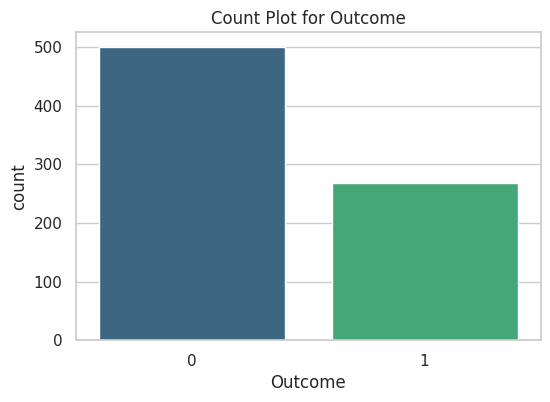

In [84]:
# Set the aesthetic style for plots
sns.set(style="whitegrid")

# 1. Count Plot for Outcome
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Outcome', palette='viridis')
plt.title('Count Plot for Outcome')
plt.show()

# Plot: Shows the distribution and outliers of glucose levels.
# Insight: Elevated glucose levels tend to cluster around diabetic cases

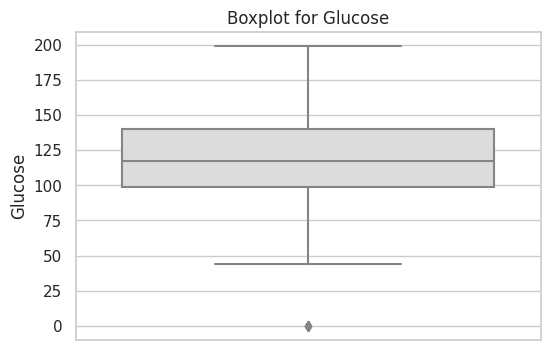

In [85]:
# 2. Boxplot for Glucose
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='Glucose', palette='coolwarm')
plt.title('Boxplot for Glucose')
plt.show()

# Plot: Combines boxplot and KDE to show BMI distribution for each Outcome.
# Insight: Diabetic cases show higher BMI concentrations.

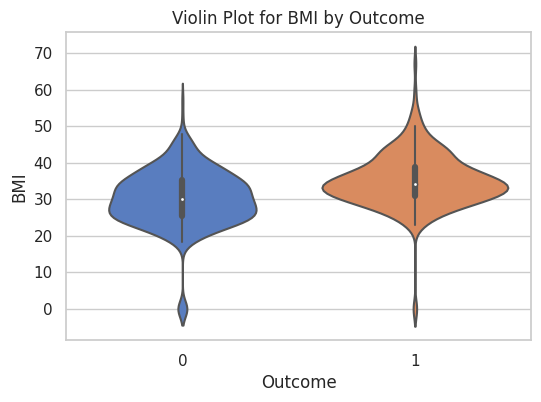

In [15]:
# 3. Violin Plot for BMI
plt.figure(figsize=(6, 4))
sns.violinplot(data=data, x='Outcome', y='BMI', palette='muted')
plt.title('Violin Plot for BMI by Outcome')
plt.show()

# Plot: Displays the relationship between age and glucose levels.
# Insight: Older individuals exhibit a broader range of glucose levels.

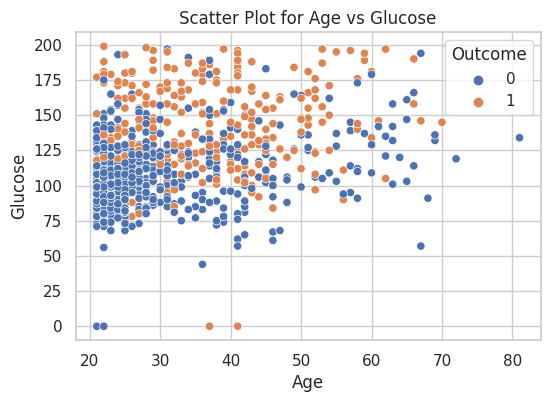

In [86]:
# 4. Scatter Plot for Age vs Glucose
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Age', y='Glucose', hue='Outcome', palette='deep')
plt.title('Scatter Plot for Age vs Glucose')
plt.show()

# Plot: Visualizes pairwise relationships between continuous features.
# Insight: Correlation trends emerge among Glucose, BMI, and Age.

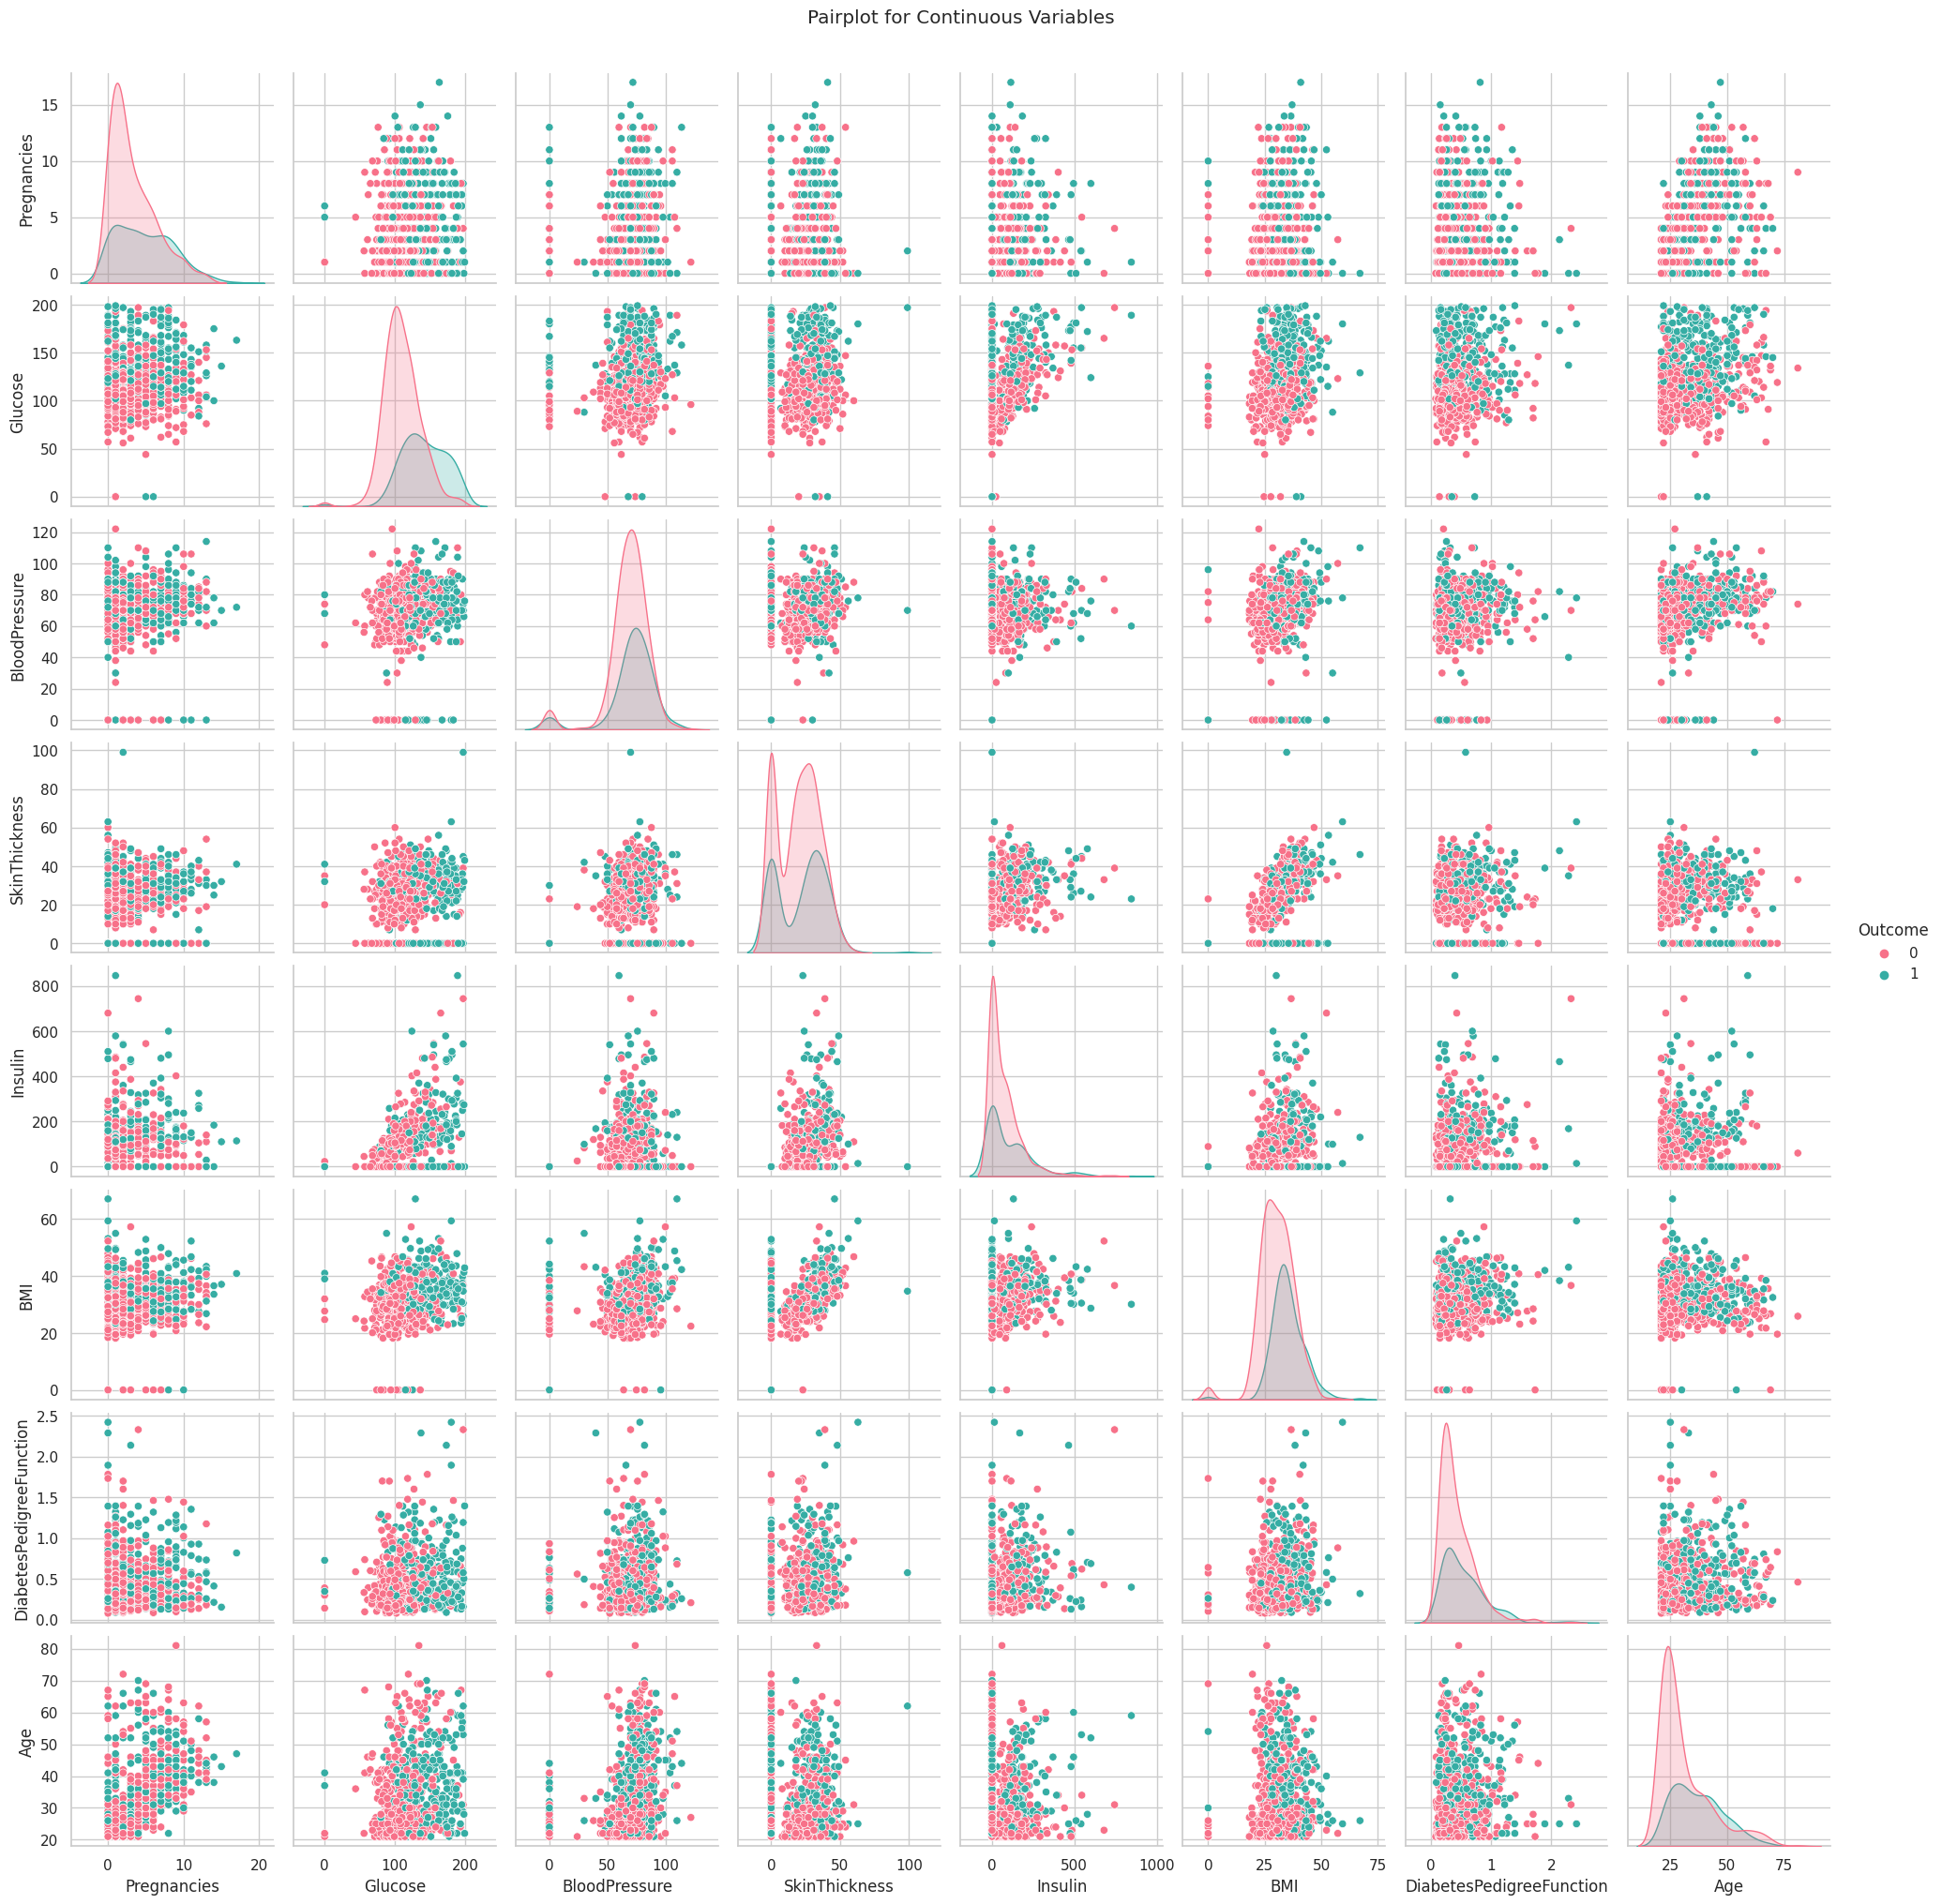

In [87]:
# 5. Pairplot for Continuous Variables
sns.pairplot(data, hue='Outcome', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot for Continuous Variables', y=1.02)
plt.show()

# Plot: Displays the correlation coefficients between features.
# Insight: Glucose and Outcome have a strong positive correlation.

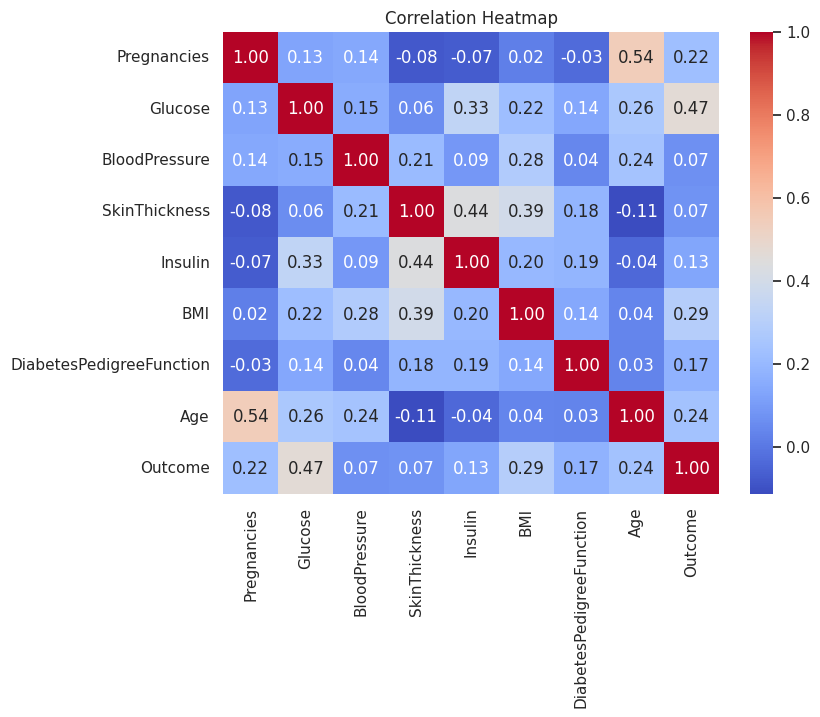

In [88]:
# 6. Heatmap for Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Plot: Distribution of patients’ ages.
# Insight: Most patients are between 20-40 years old.

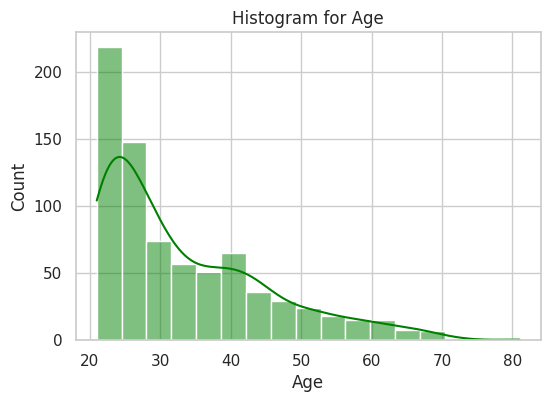

In [89]:
# 7. Histogram for Age
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Age', kde=True, color='green')
plt.title('Histogram for Age')
plt.show()

# Plot: Visualizes the density of insulin levels.
# Insight: Insulin levels are skewed, with many zeros.

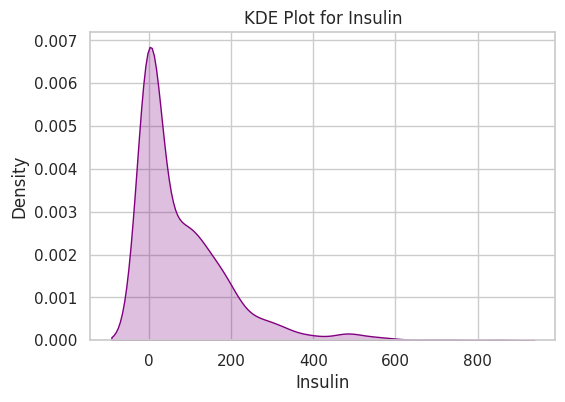

In [90]:
# 8. KDE Plot for Insulin
plt.figure(figsize=(6, 4))
sns.kdeplot(data=data, x='Insulin', fill=True, color='purple')
plt.title('KDE Plot for Insulin')
plt.show()

# Plot: Compares pregnancy counts for diabetic vs. non-diabetic cases.
# Insight: Higher pregnancy counts often associate with diabetes.


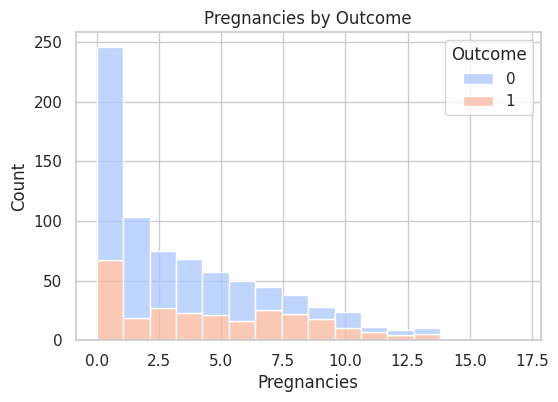

In [91]:
# 9. Stacked Bar Plot for Pregnancies by Outcome
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Pregnancies', hue='Outcome', multiple='stack', palette='coolwarm')
plt.title('Pregnancies by Outcome')
plt.show()

# Plot: Distribution of BMI values.
# Insight: Most values range between 20-40, with some outliers.

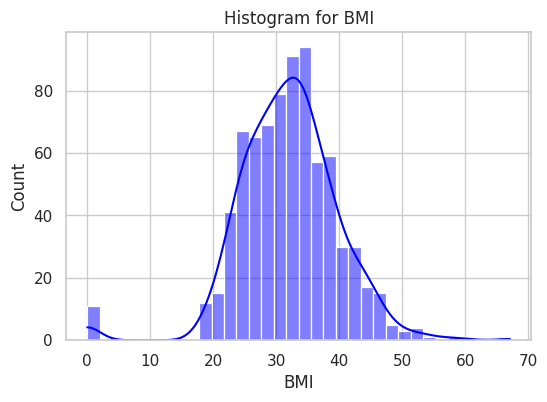

In [92]:
# 10. Histogram for BMI
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='BMI', kde=True, color='blue')
plt.title('Histogram for BMI')
plt.show()

# Plot: Identifies the spread of skin thickness values.
# Insight: Missing or zero values are evident.

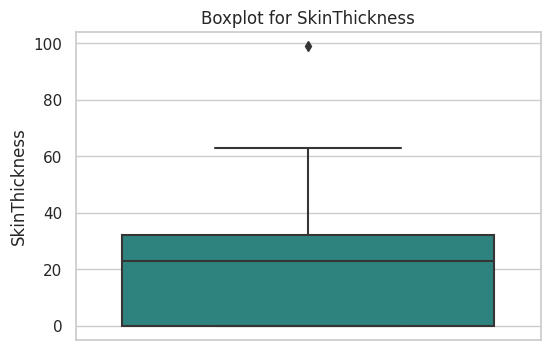

In [93]:
# 11. Boxplot for SkinThickness
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='SkinThickness', palette='viridis')
plt.title('Boxplot for SkinThickness')
plt.show()

# Plot: Examines the relationship between family history and BMI.
# Insight: A weak correlation but noticeable clustering around higher BMI.

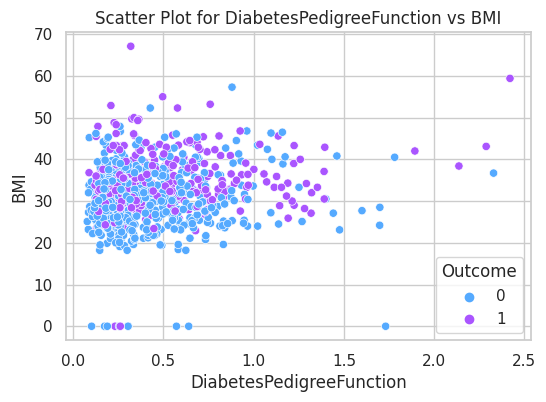

In [94]:
# 12. Scatter Plot for DiabetesPedigreeFunction vs BMI
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='DiabetesPedigreeFunction', y='BMI', hue='Outcome', palette='cool')
plt.title('Scatter Plot for DiabetesPedigreeFunction vs BMI')
plt.show()

# Plot: Density distribution of glucose for diabetic and non-diabetic cases.
# Insight: Diabetics tend to have higher glucose levels.

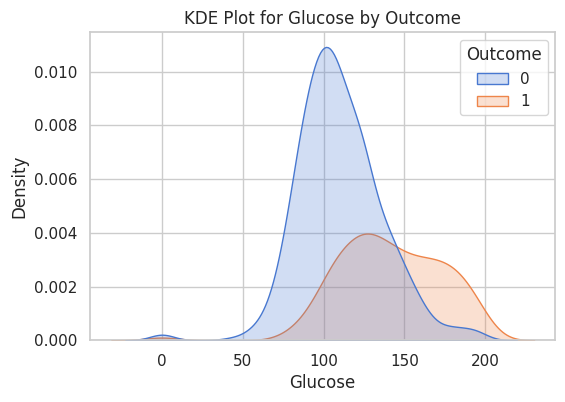

In [95]:
# 13. KDE Plot for Glucose by Outcome
plt.figure(figsize=(6, 4))
sns.kdeplot(data=data, x='Glucose', hue='Outcome', fill=True, palette='muted')
plt.title('KDE Plot for Glucose by Outcome')
plt.show()

# Plot: Highlights extreme values and trends.
# Insight: Outliers are evident among older diabetic cases.

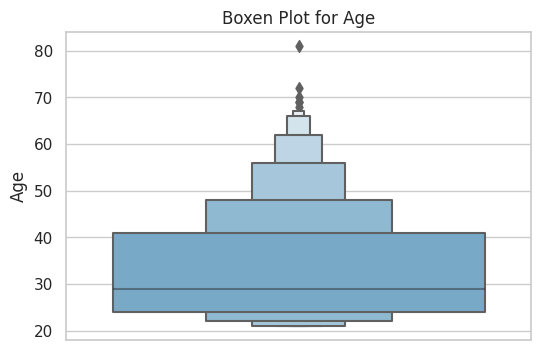

In [96]:
# 14. Boxen Plot for Age
plt.figure(figsize=(6, 4))
sns.boxenplot(data=data, y='Age', palette='Blues')
plt.title('Boxen Plot for Age')
plt.show()

# Plot: Frequency distribution of pregnancy counts.
# Insight: Most individuals have fewer than six pregnancies.

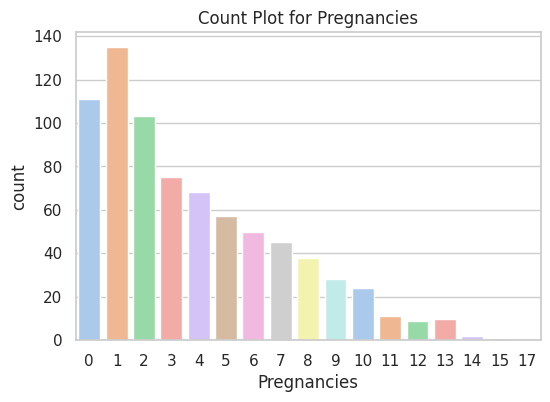

In [97]:
# 15. Count Plot for Pregnancies
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Pregnancies', palette='pastel')
plt.title('Count Plot for Pregnancies')
plt.show()


# Plot: Trends in average glucose levels across age groups.
# Insight: Glucose levels increase with age

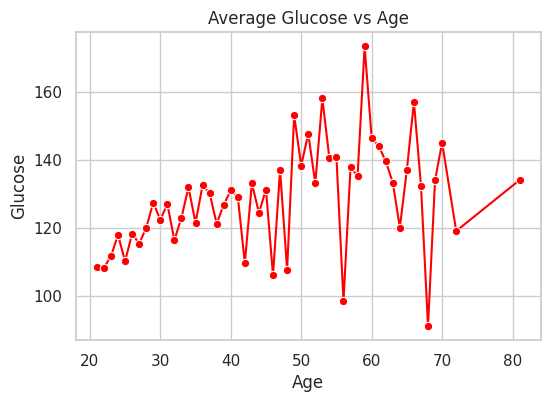

In [98]:
# 16. Line Plot for Average Glucose vs Age
avg_glucose = data.groupby('Age')['Glucose'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.lineplot(data=avg_glucose, x='Age', y='Glucose', marker='o', color='red')
plt.title('Average Glucose vs Age')
plt.show()


# Plot: Displays relationships among three variables.
# Insight: Clusters appear for higher glucose and BMI levels.

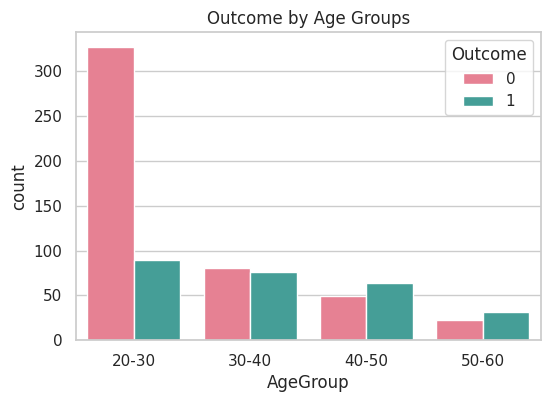

In [99]:
# 18. Count Plot for Outcome by Age Groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='AgeGroup', hue='Outcome', palette='husl')
plt.title('Outcome by Age Groups')
plt.show()

# Plot: Frequency of diabetes cases across age categories.
# Insight: Younger patients (20-30) have fewer diabetic cases.

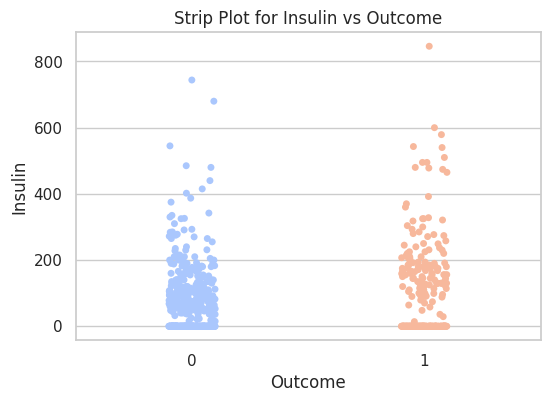

In [100]:
# 19. Strip Plot for Insulin vs Outcome
plt.figure(figsize=(6, 4))
sns.stripplot(data=data, x='Outcome', y='Insulin', jitter=True, palette='coolwarm')
plt.title('Strip Plot for Insulin vs Outcome')
plt.show()


# Plot: Highlights insulin values across diabetic and non-diabetic cases.
# Insight: Missing or zero insulin levels are common for both groups.

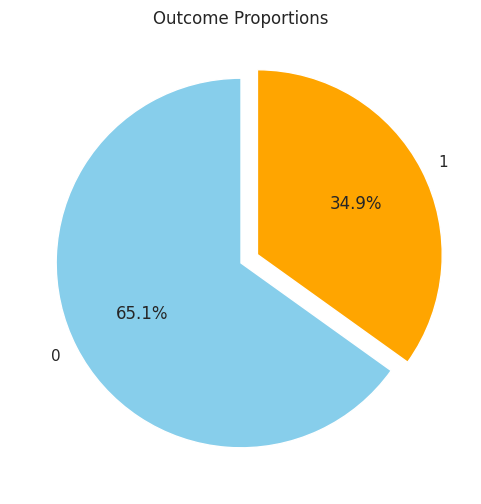

In [101]:
# 20. Pie Chart for Outcome Proportions
plt.figure(figsize=(6, 6))
data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90, explode=(0, 0.1))
plt.title('Outcome Proportions')
plt.ylabel('')
plt.show()

# Plot: Percentage distribution of diabetic vs. non-diabetic cases.
# Insight: Highlights dataset imbalance if any.

In [107]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Model: Logistic Regression
Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC-AUC: 0.8128558310376492


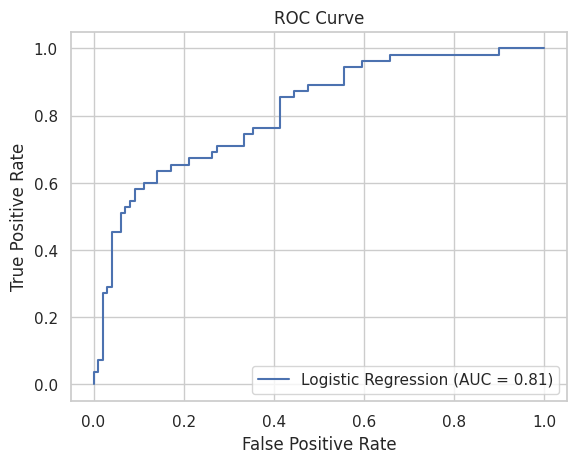

Model: Decision Tree
Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

ROC-AUC: 0.7424242424242424


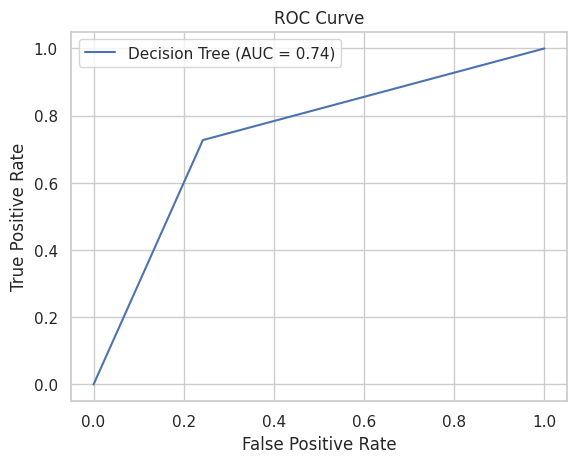

Model: Random Forest
Accuracy: 0.7207792207792207
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

ROC-AUC: 0.8120293847566575


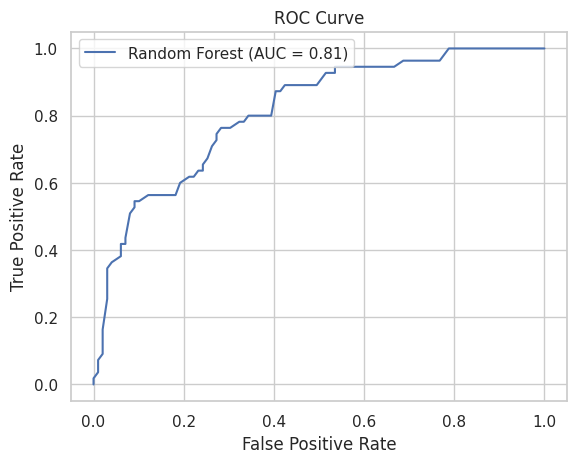

Model: Gradient Boosting
Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC-AUC: 0.8091827364554638


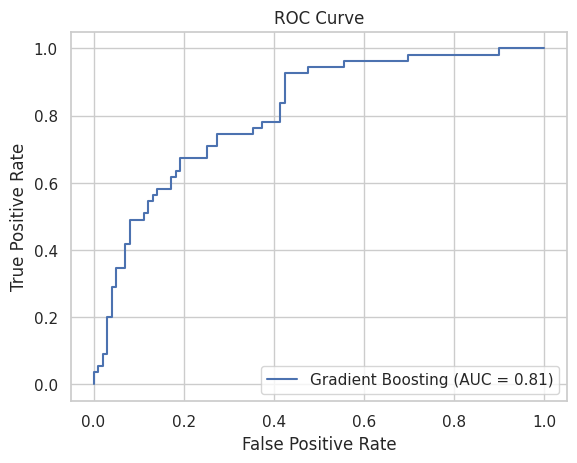

Model: Support Vector Machine
Accuracy: 0.7662337662337663
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

ROC-AUC: 0.8066115702479338


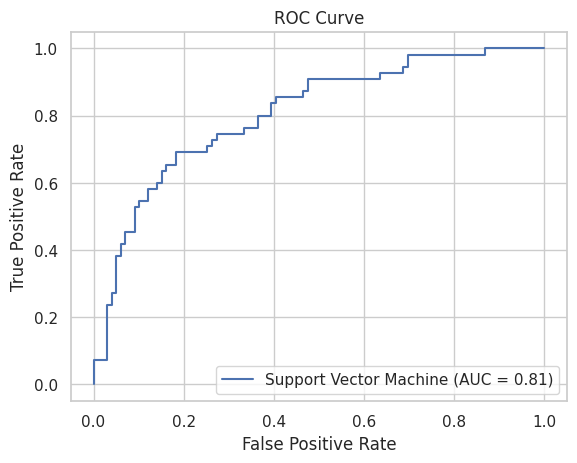

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Model Accuracy on Test Data: 0.7337662337662337


In [121]:


# Assume 'data' is the preprocessed dataset
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": classification_rep,
        "ROC-AUC": roc_auc
    }
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_rep)
    if roc_auc != "N/A":
        print(f"ROC-AUC: {roc_auc}")
        # Plot ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

# Hyperparameter Tuning for Random Forest as an example
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and performance
best_model = grid_search.best_estimator_
print("Best Parameters for Random Forest:", grid_search.best_params_)
print("Best Random Forest Model Accuracy on Test Data:", accuracy_score(y_test, best_model.predict(X_test)))
